# Text vectorisation: Turning Text into Features

More advanced forms of text analysis require that text documents are converted into numerical values or features. In this  section we will examine:

* different methods for representing a collection of texts as numbers
* the decisions we need to make when generating a particular representation as well as the kinds of insights each numerical representation can give us.

We will use tools from the Python libraries `scikit-learn` and `gensim` to perform some popular text vectorisation methods:
* Re-cap of N-grams (unigram and bi-gram) term friquency
* TF-IDF (Term Frequency–Inverse Document Frequency)
* Word embedding—Word2Vec

In [1]:
# Import libraries

! pip install gensim
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

import gensim
from gensim.models import Word2Vec

from matplotlib import pyplot as plt

## Turning text into n-grams features 
### Unigrams

Compute the friquency of word occurance using count vectoriser in `scikit-learn`  

### Toy example

In [2]:
# Text corpus

# Load the parsed news dataset 
corpus = pd.read_csv('sample_news_large_phrased.csv', index_col='index')

In [3]:
corpus.head(1)

,query,title,text,published,site,tokens
index,,,,,,
0,Hong Kong,Horrifying view of fires from space,Video Image Satellite images show insane view ...,2019-11-08T23:51:00.000+02:00,news.com.au,video|*|image|*|satellite|*|image|*|insane|*|v...


In [4]:
# Subset news stories about brexit
corpus_brexit = corpus[corpus['query']=='brexit']

corpus_toy=corpus_brexit.iloc[[7,22], [1]]

# Set the maximum width of columns
pd.options.display.max_colwidth = 200

corpus_toy.head(5)

,title
index,
132,Brexit news: Gina Miller unveils new Remainer plot to block Brexit in general election | UK | News | Express.co.uk
147,Brexit news: Labour pledge to continue ‘freedom of movement’ infuriates Leavers | UK | News | Express.co.uk


In [5]:
# Use CountVectorizer to tokenize a collection of text documents and convert it into a matrix of token counts

# Create an instance of the CountVectorizer class
vectorizer = CountVectorizer()

# Learn the vocabulary from the corpus using the toy corpus
vectorizer.fit(corpus_toy['title'])

# encode documents as vectors
vector = vectorizer.transform(corpus_toy['title'])

# The vocabulary_ attribute maps the tokens (keys) to the integer feature indices (values) in a dictionary
print(vectorizer.vocabulary_)

{'brexit': 1, 'news': 16, 'gina': 8, 'miller': 13, 'unveils': 23, 'new': 15, 'remainer': 20, 'plot': 19, 'to': 21, 'block': 0, 'in': 9, 'general': 7, 'election': 4, 'uk': 22, 'express': 5, 'co': 2, 'labour': 11, 'pledge': 18, 'continue': 3, 'freedom': 6, 'of': 17, 'movement': 14, 'infuriates': 10, 'leavers': 12}


Note that punctuation and single letter's words are removed. We will use below the prerpocessed tokens you have already preprocessed.

In [6]:
# Access the feature index of a token
vectorizer.vocabulary_.get('brexit')

1

The numbers assigned to each token (e.g., "brexit") are indices. For clarity, indices are sorted in the cell bellow.

In [7]:
# Print the matrix of rows (documents) and columns (count for the number of times a token appeared in the document) 
print(vector.toarray())

[[1 2 1 0 1 1 0 1 1 1 0 0 0 1 0 1 2 0 0 1 1 1 2 1]
 [0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 2 1 1 0 0 1 2 0]]


`vector.toarray()` returns a matrix where the rows indicate the number of documents (two in our case) and the columns indicate the size of the vocabulary of the entire corpus (all documents).

Each document is encoded as a vector with a length indicating the size of the vocabulary of the entire corpus and an integer count for the number of times each token appeared in the document.

In [8]:
# Sort the dictionary of terms (keys) and indices (values) in the feature matrix by values in ascending order
print(dict(sorted(vectorizer.vocabulary_.items(), key=lambda item: item[1])))
print(vector.toarray())

{'block': 0, 'brexit': 1, 'co': 2, 'continue': 3, 'election': 4, 'express': 5, 'freedom': 6, 'general': 7, 'gina': 8, 'in': 9, 'infuriates': 10, 'labour': 11, 'leavers': 12, 'miller': 13, 'movement': 14, 'new': 15, 'news': 16, 'of': 17, 'pledge': 18, 'plot': 19, 'remainer': 20, 'to': 21, 'uk': 22, 'unveils': 23}
[[1 2 1 0 1 1 0 1 1 1 0 0 0 1 0 1 2 0 0 1 1 1 2 1]
 [0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 2 1 1 0 0 1 2 0]]


The output consists of 24 unigram features. The 1st token `brexit` has appeared twice in the first title and once in the second title.

In [9]:
# Find (1) the most friquent token in a document, (2) the number of times it appears in that document 
# and (3) the document in which it appears
maximum = vector.toarray().max()
index_of_maximum = np.where(vector.toarray() == maximum)

print("max:", maximum)
print("index:", index_of_maximum)

max: 2
index: (array([0, 0, 0, 1, 1]), array([ 1, 16, 22, 16, 22]))


In [10]:
# Sort the vector of integer count in ascending order
np.sort(vector.toarray())

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
        2, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        2, 2]])

### Example using the entire data set of News Tokens

In [11]:
corpus['text'].head()

index
0    Video Image Satellite images show insane view of NSW fires from space Satellite images show the huge amount of smoke billowing from a number of bushfires across NSW.\nThe NSW fires, as seen from s...
1    \n Chief Executive addresses the press after citywide chaos and transport disruptions \n Earlier, police shoot protester leaving him in intensive care, while separately, a man is set on fire durin...
2    Hong Kong (CNN) China has announced a curfew on online gaming for minors among new measures aimed at curbing video game addiction.\nThe official government guidelines will be applied to all online...
3    Washington (CNN) President Donald Trump was relentlessly dishonest last week about the scandal over his dealings with Ukraine, making false claims about just about every component of the story.\nT...
4    (CNN) — What is bread? You likely don't have to think for long, and whether you're hungry for a slice of sourdough or craving some tortillas, what you imagine says a lot

In [12]:
# Convert a collection of text documents to a matrix of token counts

vectorizer_corpus = CountVectorizer()

#  Learn the vocabulary from the corpus and tokenise
vectorizer_corpus.fit(corpus['text'])

# encode documents as vectors
vector_corpus = vectorizer_corpus.transform(corpus['text'])

# summarize and print output
print(dict(sorted(vectorizer_corpus.vocabulary_.items(), key=lambda item: item[1])))

{'00': 0, '000': 1, '0002': 2, '000th': 3, '0010': 4, '0044': 5, '01': 6, '013': 7, '02': 8, '020': 9, '03': 10, '04': 11, '04c76inq0a': 12, '05': 13, '056': 14, '05am': 15, '06': 16, '07': 17, '08': 18, '0800': 19, '09': 20, '0944': 21, '0iiwtfu5gq': 22, '0s': 23, '10': 24, '100': 25, '1000': 26, '100m': 27, '101': 28, '102': 29, '103': 30, '104': 31, '105': 32, '106': 33, '106619': 34, '107': 35, '108': 36, '109': 37, '109554': 38, '10am': 39, '10k': 40, '10pm': 41, '10th': 42, '11': 43, '110': 44, '110541': 45, '111': 46, '112': 47, '113': 48, '114': 49, '115': 50, '116': 51, '117': 52, '117513': 53, '118': 54, '1187098428737753091': 55, '119': 56, '11th': 57, '12': 58, '120': 59, '1200': 60, '121': 61, '121647': 62, '122': 63, '123': 64, '124': 65, '125': 66, '126': 67, '127': 68, '128': 69, '129': 70, '12bn': 71, '12m': 72, '12th': 73, '13': 74, '130': 75, '131': 76, '132': 77, '132m': 78, '133': 79, '134': 80, '135': 81, '136': 82, '137': 83, '138': 84, '139': 85, '13am': 86, '14

In [13]:
print(vector_corpus.toarray())

[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [14]:
# Dimensions of vector_corpus.toarray(), i.e., number of rows and columns
vector_corpus.toarray().shape

(175, 14322)

## Exercise 1

Using the entire corpus, find (1) the most friquent token in a document, (2) the number of times it appears in that document and (3) the document in which it appears.

In [15]:
# Please write below the code for Exercise 1

maximum = vector_corpus.toarray().max()
index_of_maximum = np.where(vector_corpus.toarray() == maximum)

print("max:", maximum)
print("token index:", index_of_maximum)

max: 573
token index: (array([3]), array([12823]))


The the most frequent token is in document 3 and indexed 12823. 

In [16]:
# Find the token indexed 12823 by getting a key in a dictionary by its value 
# The value in the "vectorizer_corpus.vocabulary_" is the token index

dict((v,k) for k,v in vectorizer_corpus.vocabulary_.items())[12823]

'the'

In [17]:
# To double check, get value by key

vectorizer_corpus.vocabulary_.get('the')

12823

### Bi-grams (combination of two tokens)
In the unigram transformation, each token is a feature. For example, `general` and `election` are two separate features. The bi-gram transformation relaxes this contrain by pairing each word to previous and subsequent words.  

In [18]:
# Extracting unigrams and bigrams
    # ngram_range of (1, 1) extracts unigrams
    # ngram_range of (1, 2) extracts unigrams and bigrams
    # ngram_range of (1, 2) extracts bigrams

# Create an instance of the CountVectorizer class set bigram extraction   
vectorizer = CountVectorizer(ngram_range=(2,2))

# Learn the vocabulary from the corpus and tokenise
vectorizer.fit(corpus_toy['title'])

# encode documents as vectors
vector = vectorizer.transform(corpus_toy['title'])

# # The vocabulary_ attribute maps the tokens (keys) to the integer feature indices (values) in a dictionary
print(dict(sorted(vectorizer.vocabulary_.items(), key=lambda item: item[1])))
print(vector.toarray())

{'block brexit': 0, 'brexit in': 1, 'brexit news': 2, 'co uk': 3, 'continue freedom': 4, 'election uk': 5, 'express co': 6, 'freedom of': 7, 'general election': 8, 'gina miller': 9, 'in general': 10, 'infuriates leavers': 11, 'labour pledge': 12, 'leavers uk': 13, 'miller unveils': 14, 'movement infuriates': 15, 'new remainer': 16, 'news express': 17, 'news gina': 18, 'news labour': 19, 'of movement': 20, 'pledge to': 21, 'plot to': 22, 'remainer plot': 23, 'to block': 24, 'to continue': 25, 'uk news': 26, 'unveils new': 27}
[[1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1]
 [0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0]]


The output consists of 28 bigram-based features. The count is either 1 or 0 for each of our bigram.     

##  Term frequency–inverse document frequency (TF-IDF)

TF-IDF vectorisation weights down tokens that are present across many documents in the corpus (in particular, words like "of" and "the" if stop words are not removed) and are therefore less informative than tokens that are present in specific documents in the corpus. 

### Toy example

In [19]:
# Convert a collection of raw documents to a matrix of TF-IDF features
vectorizer = TfidfVectorizer(norm=None)

# Learn the vocabulary from the corpus and tokenise
matrix = vectorizer.fit_transform(corpus_toy['title'])

# Summarize & print the tokens and IDF scores 
print(dict(sorted(vectorizer.vocabulary_.items(), key=lambda item: item[1])))
print(vectorizer.idf_)

{'block': 0, 'brexit': 1, 'co': 2, 'continue': 3, 'election': 4, 'express': 5, 'freedom': 6, 'general': 7, 'gina': 8, 'in': 9, 'infuriates': 10, 'labour': 11, 'leavers': 12, 'miller': 13, 'movement': 14, 'new': 15, 'news': 16, 'of': 17, 'pledge': 18, 'plot': 19, 'remainer': 20, 'to': 21, 'uk': 22, 'unveils': 23}
[1.40546511 1.         1.         1.40546511 1.40546511 1.
 1.40546511 1.40546511 1.40546511 1.40546511 1.40546511 1.40546511
 1.40546511 1.40546511 1.40546511 1.40546511 1.         1.40546511
 1.40546511 1.40546511 1.40546511 1.         1.         1.40546511]


#### The above computes the `IDF` part. Let's get the `TF` (term frequency) as before 

In [20]:
vectorizer = CountVectorizer()
vectorizer.fit(corpus_toy['title'])
vector = vectorizer.transform(corpus_toy['title'])
print(vector.toarray())

[[1 2 1 0 1 1 0 1 1 1 0 0 0 1 0 1 2 0 0 1 1 1 2 1]
 [0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 2 1 1 0 0 1 2 0]]


#### Below we get the TF-IDF for our toy corpus

In [21]:
tf_idf_df = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
tf_idf_df

,block,brexit,co,continue,election,express,freedom,general,gina,in,...,movement,new,news,of,pledge,plot,remainer,to,uk,unveils
0,1.405465,2.0,1.0,0.000000,1.405465,1.0,0.000000,1.405465,1.405465,1.405465,...,0.000000,1.405465,2.0,0.000000,0.000000,1.405465,1.405465,1.0,2.0,1.405465
1,0.000000,1.0,1.0,1.405465,0.000000,1.0,1.405465,0.000000,0.000000,0.000000,...,1.405465,0.000000,2.0,1.405465,1.405465,0.000000,0.000000,1.0,2.0,0.000000


### How is TF-IDF computed by `scikit-learn`?  


TF-IDF(t,d) = TF * IDF

What is the TF-IDF of the term 'brexit' which is term 1 in document 0 so TF-IDF(1,0)

TF = 2

IDF = log(N + 1 / n + 1) + 1 where N is the total number of documents and n is the number of documents in which the term appears; constant “1” is added to the numerator and denominator to prevent zero divisions (see [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html)). 


In [22]:
import math as m
# the term "brexit" is present in two of two documents
IDF = m.log((2+1)/(2+1))+1 
IDF

1.0

So TF-IDF for term 1 (brexit) in document 0 is **TF-IDF (1,0) = TF * TDF = 2 * 1 = 2**

#### Let's try another example, the fourth term ('election') in document 0

TF-IDF(4.0) = TF * IDF

TF = 1

In [23]:
# the term "election" is present in one of two documents
IDF = m.log((2+1)/(1+1))+1
IDF

1.4054651081081644

So TF-IDF for term 4 ('election') in document 0 is **TF-IDF (4,0) = TF * TDF = 1 * 1.405 = 1.405**

##### The above TF-IDF matrix is not normalised. Typically, it is recommended that the TF-IDF weights are normalised meaning that the weights in the matrix will range between 0 and 1. Below is the normalisation code (L2 normalisation is default in the TfidfVectorizer function but we indicate it below for clarity)

In [24]:
# Convert a collection of raw documents to a matrix of TF-IDF features
vectorizer = TfidfVectorizer(norm ='l2')

# Learn the vocabulary from the corpus and tokenise
matrix = vectorizer.fit_transform(corpus_toy['title'])

pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())

,block,brexit,co,continue,election,express,freedom,general,gina,in,...,movement,new,news,of,pledge,plot,remainer,to,uk,unveils
0,0.238409,0.339259,0.169630,0.000000,0.238409,0.169630,0.000000,0.238409,0.238409,0.238409,...,0.000000,0.238409,0.339259,0.000000,0.000000,0.238409,0.238409,0.169630,0.339259,0.238409
1,0.000000,0.189652,0.189652,0.266549,0.000000,0.189652,0.266549,0.000000,0.000000,0.000000,...,0.266549,0.000000,0.379303,0.266549,0.266549,0.000000,0.000000,0.189652,0.379303,0.000000


### TF-IDF vectorisation of the `row` news sub-corpus related to Brexit

In [25]:
# Convert our corpus of row documents to a matrix of TF-IDF features
vectorizer = TfidfVectorizer()

# Learn the vocabulary from the corpus and tokenise
matrix = vectorizer.fit_transform(corpus_brexit['text'])

# Summarize & print the tokens and IDF scores 
print(dict(sorted(vectorizer.vocabulary_.items(), key=lambda item: item[1])))
print(vectorizer.idf_)

{'00': 0, '000': 1, '0010': 2, '0044': 3, '01': 4, '020': 5, '05': 6, '056': 7, '05am': 8, '06': 9, '07': 10, '08': 11, '0800': 12, '0944': 13, '10': 14, '100': 15, '10am': 16, '10pm': 17, '11': 18, '115': 19, '11th': 20, '12': 21, '12bn': 22, '13': 23, '13am': 24, '14': 25, '15': 26, '150': 27, '158': 28, '16': 29, '166': 30, '17': 31, '18': 32, '19': 33, '190': 34, '1939': 35, '1940': 36, '1956': 37, '1966': 38, '1969': 39, '1978': 40, '1979': 41, '1982': 42, '1983': 43, '1984': 44, '1985': 45, '1991': 46, '1993': 47, '1995': 48, '1998': 49, '20': 50, '2000': 51, '2003': 52, '2006': 53, '2009': 54, '2010': 55, '2012': 56, '2013': 57, '2016': 58, '2017': 59, '2019': 60, '2020': 61, '2021': 62, '2027': 63, '207': 64, '21': 65, '218': 66, '22': 67, '23': 68, '24': 69, '25': 70, '25c': 71, '268': 72, '27': 73, '277': 74, '28': 75, '29': 76, '299': 77, '2am': 78, '30': 79, '306': 80, '308': 81, '30am': 82, '30pm': 83, '31': 84, '322': 85, '329': 86, '33': 87, '3490': 88, '35': 89, '37': 9

In [26]:
# IDF of a few tokens in the brexit corpus
print("IDF score of the term 'the':",vectorizer.idf_[vectorizer.vocabulary_["the"]])
print("IDF score of the term 'brexit':",vectorizer.idf_[vectorizer.vocabulary_["brexit"]])
print("TF-IDF score of the term 'deal':",vectorizer.idf_[vectorizer.vocabulary_["deal"]])
print("TF-IDF score of the term 'protesters':", vectorizer.idf_[vectorizer.vocabulary_["protesters"]])

IDF score of the term 'the': 1.0800427076735364
IDF score of the term 'brexit': 1.1226023220923322
TF-IDF score of the term 'deal': 1.424883193965266
TF-IDF score of the term 'protesters': 3.159484249353372


The word `"the"` is present in many documents and hence the vector value is close to 1; Converseley, the term `"protesters"` is present in few documents and has a higher IDF value. 

In [27]:
# TF-IDF matrix
tf_idf_df = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
tf_idf_df

,00,000,0010,0044,01,020,05,056,05am,06,...,you,young,your,yourself,yvan,zeebrugge,zero,zest,zeste,zone
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.029879,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.013629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.011897,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.038800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.029817,0.045711,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.020127,0.020127,0.000000,0.000000,0.000000,0.020127,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.071353,0.000000,0.000000,0.000000,0.000000
7,0.029337,0.000000,0.000000,0.000000,0.034996,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.205443,0.000000,0.128053,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019615,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.015801,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


In [28]:
# TF-IDF of the token "the" in the brexit corpus
tf_idf_df.loc[:,['the','brexit','deal','protesters']]

,the,brexit,deal,protesters
0,0.446612,0.181332,0.156508,0.020414
1,0.527948,0.080869,0.058654,0.000000
2,0.384641,0.013786,0.069993,0.000000
3,0.484950,0.061471,0.124837,0.000000
4,0.541701,0.048725,0.027487,0.015237
5,0.309630,0.049512,0.062845,0.000000
6,0.457337,0.006338,0.000000,0.000000
7,0.287110,0.149212,0.000000,0.000000
8,0.404093,0.018530,0.007840,0.000000
9,0.308180,0.160162,0.000000,0.000000


The token `"the"` is downweighted but still has high TF-IDF weights due to the high term frequency (Note that the TF-IDF score is a product of term frequency & inverse document frequency). The term `"protesters"` is present in a few documents and because it's term frequency is 0 in many documents, the TF-IDF score is 0 too. 

### Let's explore some parameters of the TfidfVectorizer function

In [29]:
# Play with the following TfidfVectorizer parameters (use Shift + Tab to explore the parameters):
    # stop_words='english' ; stop_words: removes stopwords, only for english, some with issues; automatically filters stop words based on intra corpus document frequency of terms 
    # min_df = e.g., 0.2; float or int, default=1.0. ignores terms that have a document frequency lower than the given threshold
    # max_df = e.g., 0.9; float or int, default=1.0. ignores terms that have a document frequency higher than the given threshold
    # max_features= e.g., 5

# Convert our corpus of row documents to a matrix of TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', 
                             min_df = 0.2, 
                             max_df = 0.9) # threshold depends on corpus and question
                             # max_features=5
    
# Learn the vocabulary from the corpus and tokenise
matrix = vectorizer.fit_transform(corpus_brexit['text'])

# Summarize & print the tokens and the matrix of TF-IDF features
tf_idf_df = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
tf_idf_df

,10,12,2019,25,30,31,added,agreed,agreement,argued,...,want,wanted,warned,way,week,withdrawal,work,working,year,years
0,0.028398,0.000000,0.000000,0.000000,0.000000,0.101956,0.026862,0.000000,0.120552,0.000000,...,0.023113,0.000000,0.030138,0.000000,0.060276,0.032147,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.024270,0.000000,0.000000,0.097079,0.051155,0.061219,0.057393,0.000000,...,0.044014,0.030610,0.028697,0.000000,0.086090,0.061219,0.000000,0.000000,0.000000,0.025577
2,0.062876,0.000000,0.169310,0.071179,0.066730,0.000000,0.059477,0.071179,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.108551,0.057894,...,0.041623,0.115788,0.000000,0.000000,0.000000,0.057894,0.000000,0.000000,0.000000,0.048376
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.037055,0.051540,0.000000,0.096637,0.000000,0.000000,0.000000,0.103080,0.081730,0.129200
5,0.098151,0.196302,0.000000,0.111111,0.000000,0.088098,0.000000,0.000000,0.104167,0.000000,...,0.079884,0.000000,0.000000,0.104167,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.070475,0.000000,0.055879,0.058889,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.132141,0.000000,0.140951,0.070475,0.000000,0.000000
7,0.000000,0.000000,0.101094,0.000000,0.059766,0.000000,0.000000,0.000000,0.059766,0.063751,...,0.137502,0.000000,0.000000,0.000000,0.000000,0.063751,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.058840,0.000000,0.069572,0.117680,0.000000,0.074210,0.000000,0.074210,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.353040,0.124020
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.366790,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### TF-IDF vectorisation using the `tokenised` News sub-corpus related to Brexit

In [30]:
# Compute TF-IDF on your tokenised news corpus related to Brexit
            
vectorizer = TfidfVectorizer(stop_words='english', 
                             min_df = 0.2, 
                             max_df = 0.9) # threshold depends on corpus and question
                             # max_features = 5 # you can specify a subset of features to consider

# Tokenize and build vocab
matrix = vectorizer.fit_transform(corpus_brexit['tokens'])

# Create a DataFrame 
tf_idf_df = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
tf_idf_df

,accuse,act,add,agree,agreement,allow,announce,argue,ask,attack,...,want,warn,way,week,withdrawal,word,work,worker,write,year
0,0.000000,0.035650,0.028267,0.000000,0.133689,0.031492,0.071301,0.000000,0.056533,0.000000,...,0.048948,0.029790,0.000000,0.062984,0.035650,0.000000,0.000000,0.000000,0.035650,0.000000
1,0.028228,0.141138,0.067143,0.047174,0.052926,0.024935,0.000000,0.000000,0.067143,0.000000,...,0.058135,0.023587,0.000000,0.074805,0.056455,0.000000,0.000000,0.056455,0.028228,0.019378
2,0.000000,0.000000,0.070562,0.074364,0.000000,0.078614,0.000000,0.000000,0.141124,0.078614,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.052316,0.117391,0.000000,0.000000,0.058696,0.000000,0.055306,...,0.128944,0.156948,0.000000,0.000000,0.062609,0.000000,0.000000,0.000000,0.000000,0.042981
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050301,0.000000,0.039883,0.000000,...,0.069063,0.000000,0.094314,0.000000,0.000000,0.050301,0.126094,0.100602,0.000000,0.172658
5,0.000000,0.000000,0.000000,0.113082,0.126872,0.000000,0.135331,0.000000,0.000000,0.000000,...,0.092905,0.000000,0.126872,0.000000,0.135331,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.118646,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066093,...,0.000000,0.000000,0.000000,0.132185,0.000000,0.000000,0.187558,0.000000,0.000000,0.000000
7,0.065304,0.000000,0.000000,0.000000,0.061222,0.000000,0.000000,0.061222,0.103556,0.057687,...,0.134494,0.000000,0.000000,0.000000,0.065304,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.076787,0.000000,0.128327,0.000000,0.000000,0.000000,0.071988,0.000000,0.067831,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.421718
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Below the word `"the"` appears in more than 90% of the documents and is removed on that basis. Also, the word `"protesters"` appears in less than 20% of the documents and is removed on that basis.   

In [31]:
# Show the TF-IDF vectors for a few tokens 
tf_idf_df.loc[:,['the','brexit','deal','protesters']]

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['the', 'protesters'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [32]:
# Show only tokens that are in the tf_idf_df DataFrame
tf_idf_df.loc[:,['brexit','deal',]]

,brexit,deal
0,0.292086,0.214727
1,0.128483,0.068007
2,0.040508,0.000000
3,0.142488,0.301681
4,0.183163,0.090891
5,0.061598,0.081511
6,0.034056,0.000000
7,0.356692,0.000000
8,0.104854,0.046250
9,0.426374,0.000000


#### Plot two features using a scatter plot

Text(0, 0.5, 'deal')

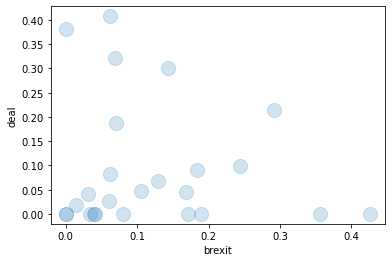

In [33]:
ax = tf_idf_df.plot(kind='scatter', x='brexit', y='deal', alpha=0.2, s=200)
ax.set_xlabel("brexit")
ax.set_ylabel("deal")

#### Cluster the 25 docuemtns about Brexit using K-means clustering

In [34]:
# For details about k-mean, see https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(matrix)

KMeans(n_clusters=3)

In [35]:
# Assign a document to a category 
tf_idf_df['category'] = km.labels_
tf_idf_df

,accuse,act,add,agree,agreement,allow,announce,argue,ask,attack,...,warn,way,week,withdrawal,word,work,worker,write,year,category
0,0.000000,0.035650,0.028267,0.000000,0.133689,0.031492,0.071301,0.000000,0.056533,0.000000,...,0.029790,0.000000,0.062984,0.035650,0.000000,0.000000,0.000000,0.035650,0.000000,2
1,0.028228,0.141138,0.067143,0.047174,0.052926,0.024935,0.000000,0.000000,0.067143,0.000000,...,0.023587,0.000000,0.074805,0.056455,0.000000,0.000000,0.056455,0.028228,0.019378,2
2,0.000000,0.000000,0.070562,0.074364,0.000000,0.078614,0.000000,0.000000,0.141124,0.078614,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
3,0.000000,0.000000,0.000000,0.052316,0.117391,0.000000,0.000000,0.058696,0.000000,0.055306,...,0.156948,0.000000,0.000000,0.062609,0.000000,0.000000,0.000000,0.000000,0.042981,1
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050301,0.000000,0.039883,0.000000,...,0.000000,0.094314,0.000000,0.000000,0.050301,0.126094,0.100602,0.000000,0.172658,1
5,0.000000,0.000000,0.000000,0.113082,0.126872,0.000000,0.135331,0.000000,0.000000,0.000000,...,0.000000,0.126872,0.000000,0.135331,0.000000,0.000000,0.000000,0.000000,0.000000,2
6,0.000000,0.000000,0.118646,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066093,...,0.000000,0.000000,0.132185,0.000000,0.000000,0.187558,0.000000,0.000000,0.000000,1
7,0.065304,0.000000,0.000000,0.000000,0.061222,0.000000,0.000000,0.061222,0.103556,0.057687,...,0.000000,0.000000,0.000000,0.065304,0.000000,0.000000,0.000000,0.000000,0.000000,2
8,0.000000,0.076787,0.000000,0.128327,0.000000,0.000000,0.000000,0.071988,0.000000,0.067831,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.421718,0
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2


#### Plot the 3 clusters using a scatter plot

Text(0, 0.5, 'deal')

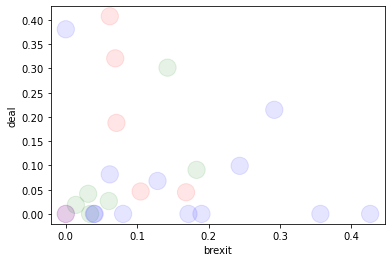

In [36]:
# Specify a color for each category
colormap = {
    0: 'red',
    1: 'green',
    2: 'blue'
}

# Create a color map
colors = tf_idf_df.apply(lambda row: colormap[row.category], axis=1)

# # Plot your scatter plot
ax = tf_idf_df.plot(kind='scatter', x='brexit', y='deal', alpha=0.1, s=300, c=colors)
ax.set_xlabel("brexit")
ax.set_ylabel("deal")

### Cluster the terms `brexit` and `deal` using TF-IDF for the entire corpus  

In [37]:
# Compute TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', 
                             min_df = 0.1, 
                             max_df = 0.9, # threshold depends on corpus and question
                             max_features=100) 
matrix = vectorizer.fit_transform(corpus['tokens'])

# DataFrame
tf_idf_df = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
tf_idf_df

,accord,add,allow,ask,big,billion,brexit,build,business,california,...,user,video,want,way,website,week,work,world,write,year
0,0.065904,0.000000,0.000000,0.000000,0.073009,0.088046,0.0,0.000000,0.000000,0.000000,...,0.000000,0.172412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.079559,0.171984,0.000000,0.000000,0.088136,0.106290,0.0,0.000000,0.000000,0.000000,...,0.107447,0.104068,0.000000,0.000000,0.000000,0.000000,0.074522,0.177753,0.000000,0.000000
3,0.040884,0.034369,0.026728,0.026259,0.080517,0.054620,0.0,0.023524,0.024954,0.014896,...,0.000000,0.005942,0.101466,0.014157,0.006658,0.091802,0.029785,0.060895,0.028260,0.214770
4,0.028326,0.153084,0.033334,0.032748,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.030129,0.088280,0.000000,0.000000,0.026533,0.221506,0.035244,0.093982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,0.000000,0.060369,0.000000,0.000000,0.000000,0.000000,0.0,0.072309,0.061363,0.000000,...,0.075431,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062394,0.000000,0.000000
171,0.000000,0.106149,0.115568,0.000000,0.000000,0.131204,0.0,0.000000,0.107898,0.000000,...,0.000000,0.000000,0.104458,0.000000,0.000000,0.000000,0.000000,0.109710,0.000000,0.081459
172,0.000000,0.050041,0.000000,0.000000,0.102578,0.061853,0.0,0.000000,0.101732,0.000000,...,0.062527,0.000000,0.000000,0.096193,0.000000,0.049244,0.043366,0.051720,0.057605,0.192009
173,0.129818,0.140315,0.000000,0.000000,0.000000,0.260152,0.0,0.000000,0.071313,0.000000,...,0.087662,0.000000,0.000000,0.000000,0.000000,0.000000,0.121598,0.000000,0.080761,0.053839


Text(0, 0.5, 'deal')

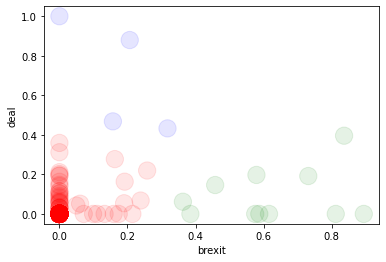

In [38]:
# Cluster with 3 categories
# Use only the terms 'brexit' and 'deal'
km = KMeans(n_clusters=3)
km.fit(tf_idf_df[['brexit', 'deal']])

# Assign the category to the dataframe
tf_idf_df['category'] = km.labels_

# Create a color map
colormap = { 0: 'red', 1: 'green', 2: 'blue' }
colors = tf_idf_df.apply(lambda row: colormap[row.category], axis=1)

# Plot your scatter plot
ax = tf_idf_df.plot(kind='scatter', x='brexit', y='deal', alpha=0.1, s=300, c=colors)
ax.set_xlabel("brexit")
ax.set_ylabel("deal")

## Word Embeddings and word2vec

> You shall know a word by the company it keeps (Firth, 1957).

`Word2vec` [Mikolov et al., 2013](https://arxiv.org/abs/1301.3781) and related techniques (e.g., [GloVe](https://nlp.stanford.edu/projects/glove/)) use the context of a given word — i.e., the words surrounding a word — to learn its meaning and represent it as vectors.

Two word2vec models: Skip-Gram and Continuous Bag of Words (CBOW)

The skip-gram model predicts the probabilities of a word given the context of word or words. For example, in the sentence "UK agrees Brexit trade deal", we have a target word and context words surrounding the target word. The number of words to be considered around the target word is called the window size. Using a window size of 2, here are the first three target and context variables for the sentence "UK agrees Brexit trade deal with EU": 

| Target word | Context word(s) |
|---|--------|
| UK | agree Brexit |
| agree | UK Brexit trade |
| Brexit | UK agree trade deal  |

See Akshay Kulkarni and Adarsha Shivananda. 2019. Natural Language Processing Recipes. [Chapter 3: Converting Text to Features](https://learning.oreilly.com/library/view/natural-language-processing/9781484242674/html/475440_1_En_3_Chapter.xhtml#)

In [39]:
# Convert your tokens in the News dataset into a list
corpus_brexit['tokens']= corpus_brexit['tokens'].apply(lambda token_string: token_string.split('|*|'))

<ipython-input-39-148acfbc1404>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus_brexit['tokens']= corpus_brexit['tokens'].apply(lambda token_string: token_string.split('|*|'))


In [40]:
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

# training the word2vec model
skipgram = Word2Vec(corpus_brexit['tokens'], size =300, window = 3, min_count=1,sg = 1)

print("Dimensionality—size of vocabulary and size of vectors:", skipgram)

# access vector for one word, "brexit" in this instance
print("vectors for 'brexit':", skipgram['brexit'])

Dimensionality—size of vocabulary and size of vectors: Word2Vec(vocab=2674, size=300, alpha=0.025)
vectors for 'brexit': [ 0.0903901  -0.08275194 -0.03314521 -0.0091846   0.01003077 -0.01110888
  0.01148339  0.02656397  0.0157572  -0.01568298 -0.01145291  0.00911073
  0.04919012  0.03806839  0.01356362  0.02393033 -0.1015764   0.02313515
  0.05271523 -0.0013014  -0.01810776  0.02616046 -0.09143462 -0.09862667
 -0.00230064  0.05792775 -0.06797434 -0.07880198  0.00338839  0.08432209
  0.02675877  0.04876341  0.0029275  -0.02341838  0.0031891   0.0703762
  0.00915583  0.0030109   0.05707097  0.00021934  0.01178593 -0.00288816
  0.01214582  0.05548288  0.0047847  -0.00135915 -0.02397475  0.05337761
 -0.01005676 -0.05029875 -0.01706394  0.01410587  0.01840231  0.0484147
 -0.04877066  0.01515179 -0.03185188 -0.02736942  0.09699644 -0.01145141
 -0.09155598  0.03877907 -0.00348726  0.05520723 -0.02771885 -0.02372083
  0.00875247 -0.08109473 -0.04738385  0.0682812  -0.02320802 -0.01126779
 -0.0

<ipython-input-40-b6e4aa263b96>:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print("vectors for 'brexit':", skipgram['brexit'])


In [41]:
skipgram.wv.similarity('brexit', 'migration')

0.96641076

In [42]:
skipgram.wv.most_similar(positive = "brexit")

[('-pron-', 0.9996341466903687),
 ('party', 0.9994503855705261),
 ('uk', 0.99944669008255),
 ('leave', 0.9994416236877441),
 ('labour', 0.9994405508041382),
 ('vote', 0.9994209408760071),
 ('people', 0.9994162321090698),
 ('gainsbourg', 0.9993948936462402),
 ('parliament', 0.9993796348571777),
 ('prime_minister', 0.9993693232536316)]

<ipython-input-43-d1d78608db6a>:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  data = skipgram[skipgram.wv.vocab]


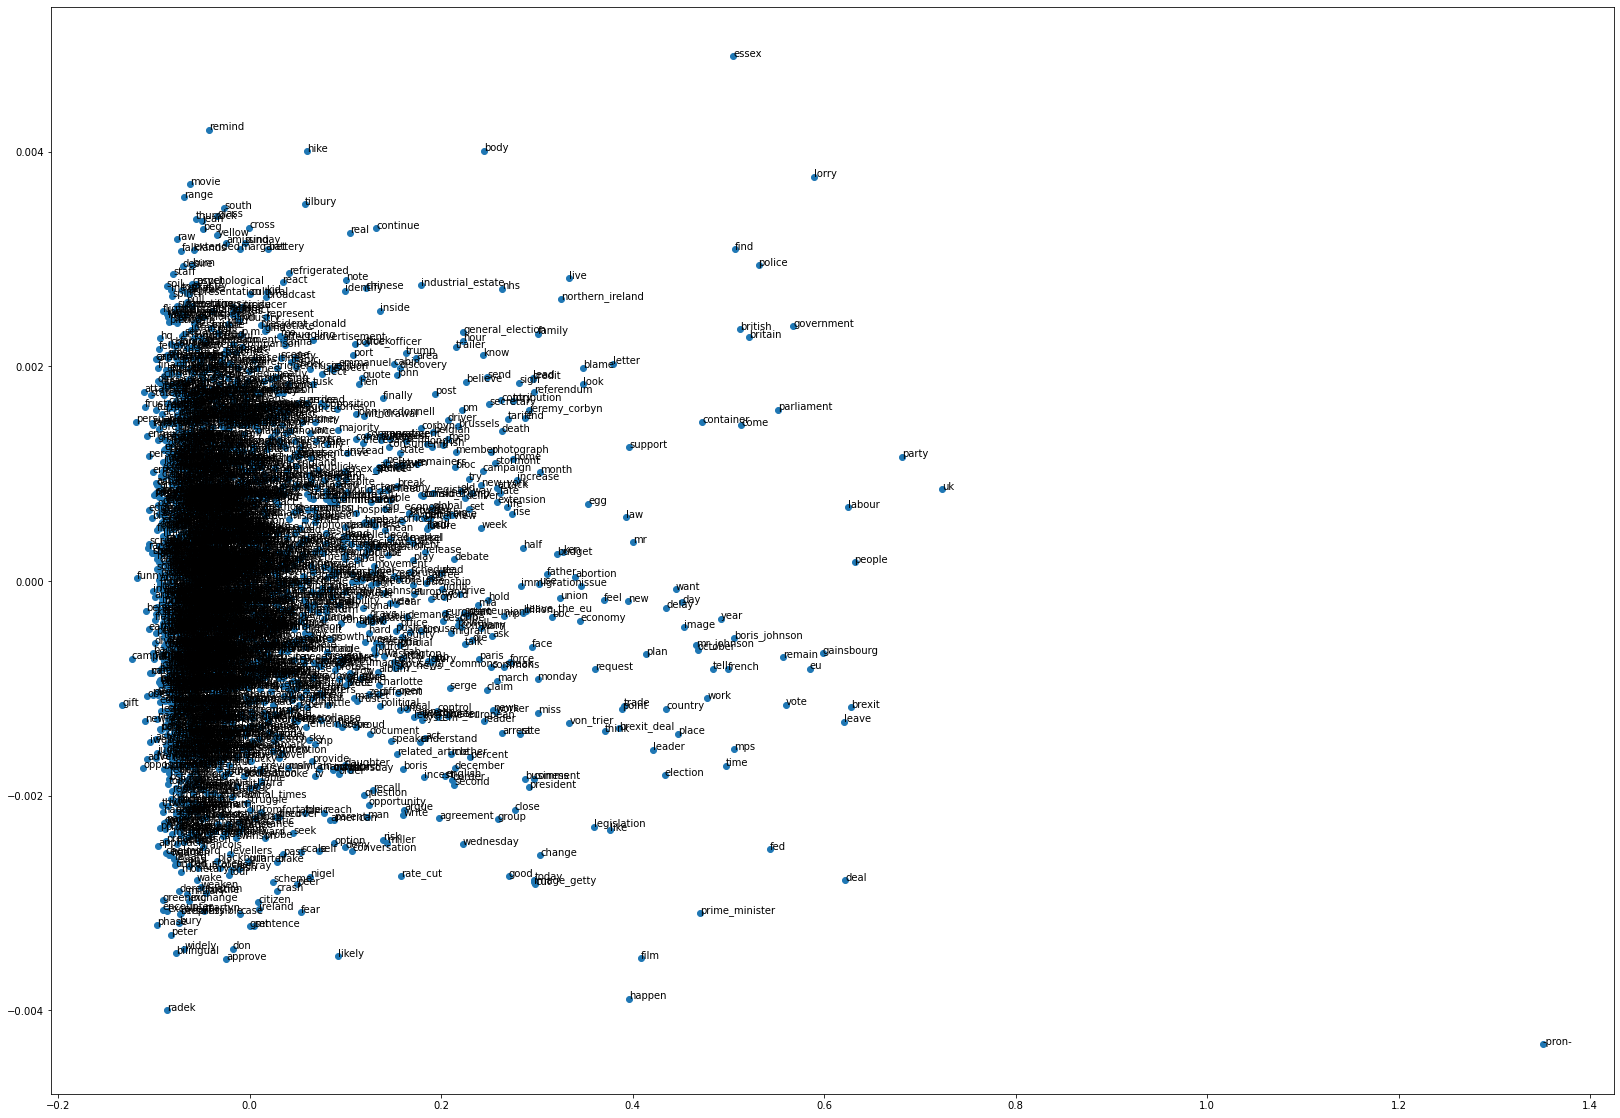

In [43]:
# Fit Principal component analysis (PCA) on the skipgram model output and plot the first 2 components

data = skipgram[skipgram.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(data)
# create a scatter plot of the projection
plt.figure(figsize=(28,20))
plt.scatter(result[:, 0], result[:, 1])
words = list(skipgram.wv.vocab)

for i, word in enumerate(words):
       plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()


## Acknowledgements

1. [Converting Text to Features,](https://learning.oreilly.com/library/view/natural-language-processing/9781484242674/html/475440_1_En_3_Chapter.xhtml#) in _Natural Language Processing Recipes_. Akshay Kulkarni & Adarsha Shivananda. 2019.
2. [Sklearn's module on feature extraction](https://scikit-learn.org/stable/modules/feature_extraction.html).
3. [Vector Semantics and Embeddings,](https://web.stanford.edu/~jurafsky/slp3/6.pdf) in _Speech and Language Processing_. Daniel Jurafsky & James H. Martin. Draft of December 30, 2020.
4. [K-Means Clustering with scikit-learn.](http://jonathansoma.com/lede/algorithms-2017/classes/clustering/k-means-clustering-with-scikit-learn/)
5. [Pandas for Everyone.](https://www.pearson.com/us/higher-education/program/Chen-Pandas-for-Everyone-Python-Data-Analysis/PGM335102.html). Daniel Chen. 2018. 